In [20]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from nltk.tag import CRFTagger

%matplotlib inline

In [21]:
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-januari-tahun-2014.csv'
raw_data_1 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-februari-tahun-2014.csv'
raw_data_2 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-maret-tahun-2014.csv'
raw_data_3 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-april-tahun-2014.csv'
raw_data_4 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-mei-tahun-2014.csv'
raw_data_5 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-juni-tahun-2014.csv'
raw_data_6 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-juli-tahun-2014.csv'
raw_data_7 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-agustus-tahun-2014.csv'
raw_data_8 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-september-tahun-2014.csv'
raw_data_9 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-oktober-tahun-2014.csv'
raw_data_10 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-november-tahun-2014.csv'
raw_data_11 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
datafile = 'data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-bulan-desember-tahun-2014.csv'
raw_data_12 = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

raw_data = raw_data_1
raw_data = raw_data.append(raw_data_2)
raw_data = raw_data.append(raw_data_3)
raw_data = raw_data.append(raw_data_4)
raw_data = raw_data.append(raw_data_5)
raw_data = raw_data.append(raw_data_6)
raw_data = raw_data.append(raw_data_7)
raw_data = raw_data.append(raw_data_8)
raw_data = raw_data.append(raw_data_9)
raw_data = raw_data.append(raw_data_10)
raw_data = raw_data.append(raw_data_11)
raw_data = raw_data.append(raw_data_12)



In [22]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

data = pd.DataFrame(columns=['judul_berita_fixed'])

# raw_data['judul_berita_fixed'] = stopword.remove(raw_data['judul_berita']).astype(str)
df = []
for i, kalimat in enumerate (raw_data['judul_berita']):
    stop = stopword.remove(kalimat.lower())
    df.append(stop)
raw_data['judul_berita_fixed'] = df

raw_data.insert(0, 'id', range(0, len(raw_data)))

raw_data


,id,tanggal_rilis,jam_rilis,judul_berita,link,judul_berita_fixed
0,0,2014-01-01,1899-12-31T01:12:40Z,Jokowi Rayakan Tahun Baru Bersama Warga,https://beritajakarta.com/read/115/Jokowi_Raya...,jokowi rayakan tahun baru bersama warga
1,1,2014-01-01,1899-12-31T11:52:11Z,Ratusan Warga Punguti Sampah di Ancol,https://beritajakarta.com/read/116/Ratusan_War...,ratusan warga punguti sampah ancol
2,2,2014-01-01,1899-12-31T12:25:40Z,Perayaan JNF Sisakan 150 Ton Sampah,https://beritajakarta.com/read/127/Perayaan_JN...,perayaan jnf sisakan 150 ton sampah
3,3,2014-01-01,1899-12-31T01:09:33Z,JKN Resmi Diberlakukan di Jakarta,https://beritajakarta.com/read/136/JKN_Resmi_D...,jkn resmi diberlakukan jakarta
4,4,2014-01-01,1899-12-31T03:12:14Z,PNS DKI Bakal Dilarang Bawa Kendaraan Pribadi ...,https://beritajakarta.com/read/137/PNS_DKI_Bak...,pns dki bakal dilarang bawa kendaraan pribadi ...
...,...,...,...,...,...,...
534,6023,2014-12-31,1899-12-31T09:40:53Z,"Gelar Malam Renungan, Ahok Bagikan Ribuan Lili...",https://beritajakarta.com/read/7268/Gelar_Mala...,"gelar malam renungan, ahok bagikan ribuan lili..."
535,6024,2014-12-31,1899-12-31T10:12:14Z,Ahok Beberkan Alasan Perombakan Pejabat DKI,https://beritajakarta.com/read/7261/Ahok_Beber...,ahok beberkan alasan perombakan pejabat dki
536,6025,2014-12-31,1899-12-31T10:40:06Z,Ribuan Pengunjung Padati Area JNF,https://beritajakarta.com/read/7269/Ribuan_Pen...,ribuan pengunjung padati area jnf
537,6026,2014-12-31,1899-12-31T11:10:20Z,Bazis Sebar 259 Kotak Amal di Gerai Usaha Ritel,https://beritajakarta.com/read/7252/Bazis_Seba...,bazis sebar 259 kotak amal gerai usaha ritel


In [23]:
reindexed_data = raw_data['judul_berita_fixed']
reindexed_data.index = raw_data['id']

raw_data.shape

(6028, 6)

In [24]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

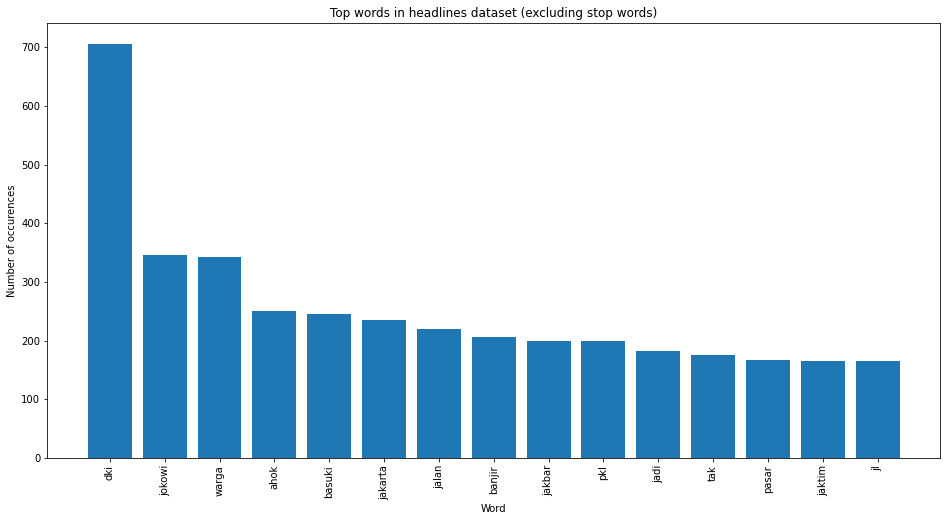

In [25]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [26]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [27]:
# tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]
tagged_headlines_1 = [ct.tag_sents([reindexed_data[i].split()]) for i in range(reindexed_data.shape[0])]

tagged_headlines = []
for x in tagged_headlines_1: 
    for y in x:
        token_in_sentence = []
        for z in y:
            token_in_sentence.append(z)
    tagged_headlines.append(token_in_sentence)
tagged_headlines

[[('jokowi', 'NN'),
  ('rayakan', 'VB'),
  ('tahun', 'NN'),
  ('baru', 'JJ'),
  ('bersama', 'IN'),
  ('warga', 'NN')],
 [('ratusan', 'CD'),
  ('warga', 'NN'),
  ('punguti', 'VB'),
  ('sampah', 'NN'),
  ('ancol', 'JJ')],
 [('perayaan', 'NN'),
  ('jnf', 'NN'),
  ('sisakan', 'VB'),
  ('150', 'CD'),
  ('ton', 'NND'),
  ('sampah', 'NN')],
 [('jkn', 'NN'), ('resmi', 'JJ'), ('diberlakukan', 'VB'), ('jakarta', 'CC')],
 [('pns', 'NN'),
  ('dki', 'VB'),
  ('bakal', 'MD'),
  ('dilarang', 'VB'),
  ('bawa', 'VB'),
  ('kendaraan', 'NN'),
  ('pribadi', 'NN'),
  ('kantor', 'NN')],
 [('karyawan', 'NN'),
  ('bus', 'NN'),
  ('akap', 'VB'),
  ('lebak', 'VB'),
  ('bulus', 'NN'),
  ('minta', 'VB'),
  ('relokasi', 'NN'),
  ('jaksel', 'NNP')],
 [('jokowi', 'VB'),
  ('beri', 'NN'),
  ('nilai', 'NN'),
  ('8', 'CD'),
  ('pelaksanaan', 'NN'),
  ('jnf', 'JJ')],
 [('malam', 'NN'),
  ('tahun', 'NN'),
  ('baru,', 'NN'),
  ('772', 'CD'),
  ('kendaraan', 'NN'),
  ('ditilang', 'NN')],
 [('blok', 'NN'),
  ('g', 'NN'),
  

In [28]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  35907
Mean number of words per headline:  5.95670205706702


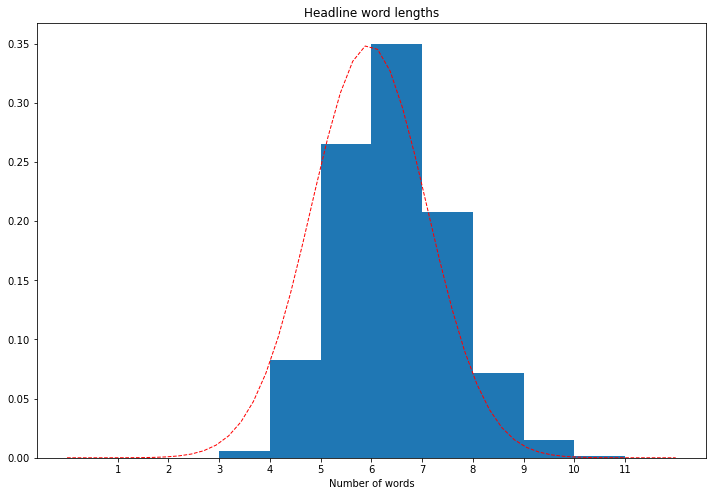

In [29]:
y = stats.norm.pdf(np.linspace(0,12,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(word_counts, bins=range(1,12), density=True);
ax.plot(np.linspace(0,12,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,12));
ax.set_xlabel('Number of words');
plt.show()

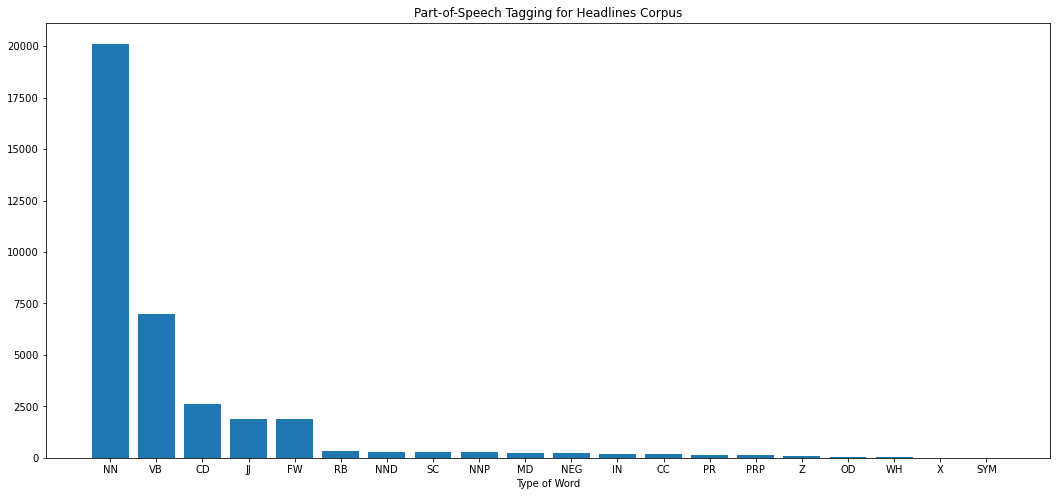

In [30]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

https://www.guru99.com/pos-tagging-chunking-nltk.html

In [31]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=3000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: belasan orangtua siswa sambangi stip
Headline after vectorization: 
  (0, 2503)	1
  (0, 3464)	1
  (0, 475)	1
  (0, 3289)	1
  (0, 3514)	1


In [32]:
n_topics = 100

In [33]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [34]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [35]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)


In [36]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [37]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  dki pemprov bangun dprd rp pns ahok jadi gelar jokowi
Topic 2:  warga kali kampung jakarta sampah minta rusun mengungsi pulo waduk
Topic 3:  jokowi ahok jakarta minta tak cuti jadi capres basuki bahas
Topic 4:  pkl ditertibkan lapak monas liar pasar puluhan jl bangunan jalan
Topic 5:  jalan rusak banjir jakbar sejumlah jakarta diperbaiki proyek titik berlubang
Topic 6:  basuki jakarta jadi tak minta mau rp monas punya wagub
Topic 7:  ahok minta jakarta mau kantor curiga ancam lebih lantik sampah
Topic 8:  transjakarta bus ahok tak operasional koridor pengadaan jalur sopir segera
Topic 9:  terbakar rumah ludes hangus mewah bangunan kos gudang banjir rp
Topic 10:  liar parkir dibongkar marak bangunan kendaraan razia mobil terjaring jakut
Topic 11:  jakarta hujan hari jalan diguyur transjakarta marathon waspada malam pelari
Topic 12:  jakbar rp miliar juta 20 pajak jadi kantor wisata siap
Topic 13:  sampah pasar truk menumpuk jakpus ton jalan diangkut angkut rusak
Topic 14:  ban

In [ ]:
# top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
# labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

# fig, ax = plt.subplots(figsize=(16,8))
# ax.bar(lsa_categories, lsa_counts);
# ax.set_xticks(lsa_categories);
# ax.set_xticklabels(labels);
# ax.set_ylabel('Number of headlines');
# ax.set_title('LSA topic counts');
# plt.show()